# Study of Probleam and Model decision  
Estimation of loan approval based on persons personal attributes  
Models Probleam is calssification  
Performance Measures are AUC & ROC(False Negatives, False Positives, Precision, Recall, threshold, Confusion Matrix), Balance Accurancy  
Useful Models include logistic Regression, Random Forest, SVM and KNN  

In [1]:
# Importing required framework libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import required DataPipeLine libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import processing and evaluation libraries
import scipy.stats as stats #for qq plots
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, confusion_matrix, classification_report

# Import Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
#from lightgbm import LGBMClassifier #Light Gradient Boosting Machine based on Decision Tree

# Study of Data  
the target is decided as loan_status column   
It can be seen that person_home_ownership and cb_person_default_on_file are catogorical-Ordinal variable  
It can be seen that loan_intent and loan_grade are catogorical-nominal variables  
There 165 duplicate entries in the DataSet  
person_emp_length(3%) and loan_int_rate(11%) have null value in them  
Majority of the features are positive(left) skewed and also seem to have outliers  
They were outliers in person_age, person_income and person_emp_length, outlier should be based on these columns  

In [2]:
# Read the Data
df = pd.read_csv('credit_risk_dataset.csv')
print(">>Shape of Original Data: ",df.shape)
df.head(5)

>>Shape of Original Data:  (32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
## Description of the DataSet
print("Raw DataSet Stats are:",)
display(df.describe())

## Check for any duplicate entries in the dataset
print(">>Number of Duplicate entries in the dataset: ",len(df[df.duplicated()]), "\n")

## Check for Sample and count of Unique values
#for name, values in df.iteritems():
#    unique_value = df['{0}'.format(name)].unique()    
#    print('>>{name}: {value} and dtype: {dtype}, unique_value_count: {unique_value_count}'.format(
#        name=name, value=values[0],dtype=df['{0}'.format(name)].dtype,unique_value_count=len(unique_value)))
#    print("Frist 5 Unique value for %s cloumn are %s"%(name, unique_value[:5]))

for col in df:
    print(">>Unique values in a column ",col, '--->', df[col].nunique())
    print("dtype of column ",col, '--->', df[col].dtype)
    if df[col].nunique()<20:
        print(df[col].value_counts(normalize=True)*100)
    print()
    
## Check for Nullvalues in any Column
#### show the boolean dataframe            
#print(">>show the boolean Dataframe : \n", df.isnull())  
#### Count total NaN at each column in a DataFrame
#print(">>Count total NaN at each column in a DataFrame : \n", df.isnull().sum())
#### Percentail of missing values in the DataSet
print(">>Percentile Count total NaN at each column in a DataFrame : \n", np.round(df.isnull().sum()* 100 / df.shape[0], 3))

Raw DataSet Stats are:


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


>>Number of Duplicate entries in the dataset:  165 

>>Unique values in a column  person_age ---> 58
dtype of column  person_age ---> int64

>>Unique values in a column  person_income ---> 4295
dtype of column  person_income ---> int64

>>Unique values in a column  person_home_ownership ---> 4
dtype of column  person_home_ownership ---> object
RENT        50.477272
MORTGAGE    41.263313
OWN          7.931003
OTHER        0.328412
Name: person_home_ownership, dtype: float64

>>Unique values in a column  person_emp_length ---> 36
dtype of column  person_emp_length ---> float64

>>Unique values in a column  loan_intent ---> 6
dtype of column  loan_intent ---> object
EDUCATION            19.806022
MEDICAL              18.633559
VENTURE              17.553175
PERSONAL             16.945459
DEBTCONSOLIDATION    15.997053
HOMEIMPROVEMENT      11.064731
Name: loan_intent, dtype: float64

>>Unique values in a column  loan_grade ---> 7
dtype of column  loan_grade ---> object
A    33.077561
B    

#### Study of Numeric Cloumns Distribution

Plots for person_age cloumn with no transformation: 


c:\users\koriv\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


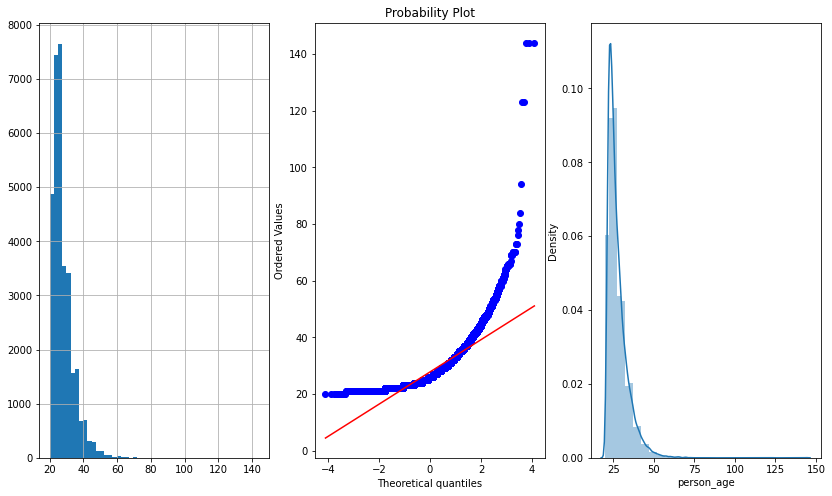

Plots for person_income cloumn with no transformation: 


c:\users\koriv\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


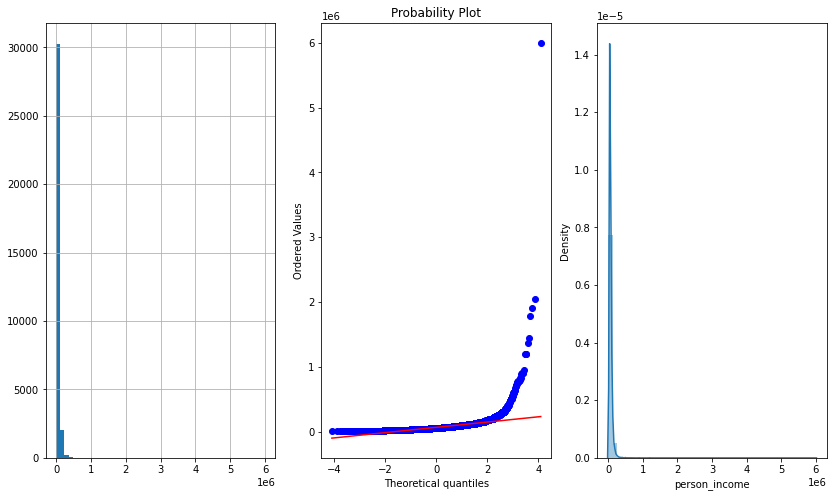

Plots for person_emp_length cloumn with no transformation: 


c:\users\koriv\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


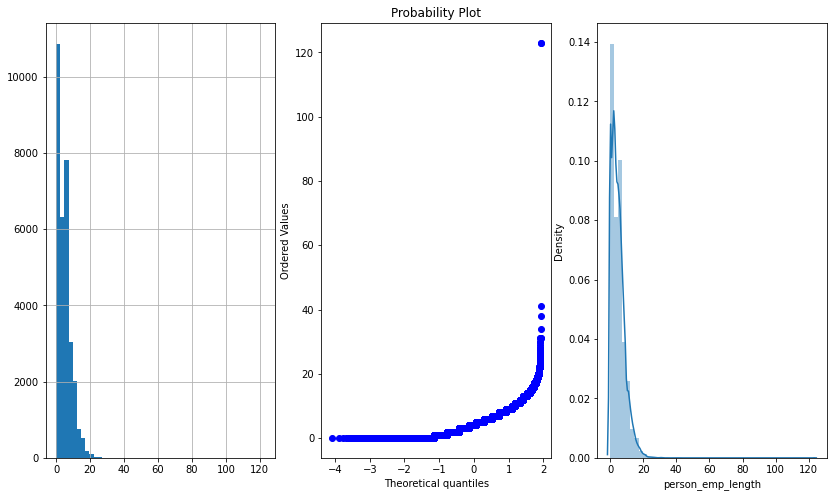

Plots for loan_amnt cloumn with no transformation: 


c:\users\koriv\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


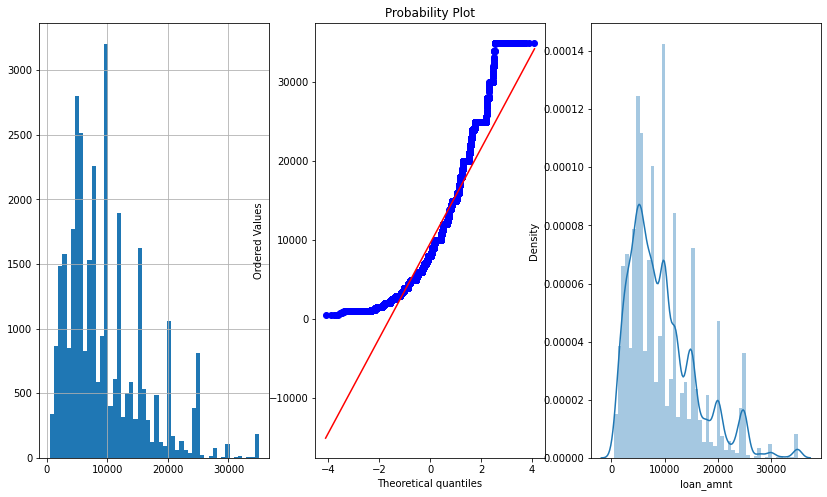

Plots for loan_int_rate cloumn with no transformation: 


c:\users\koriv\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


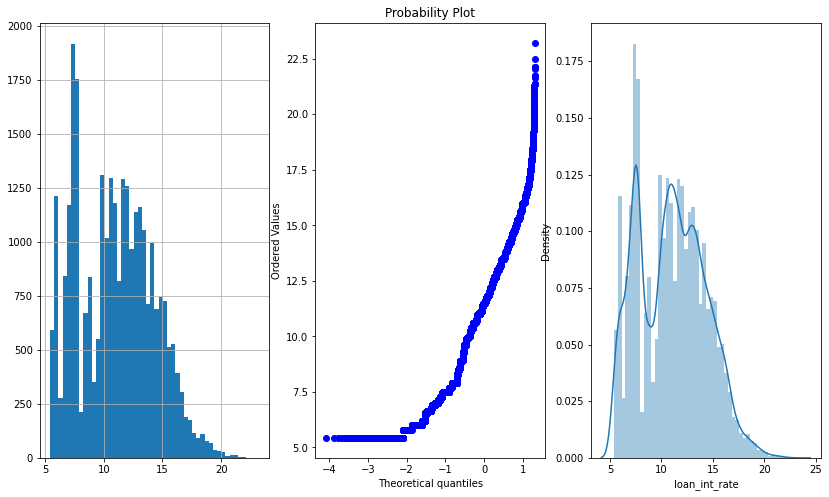

Plots for loan_percent_income cloumn with no transformation: 


c:\users\koriv\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


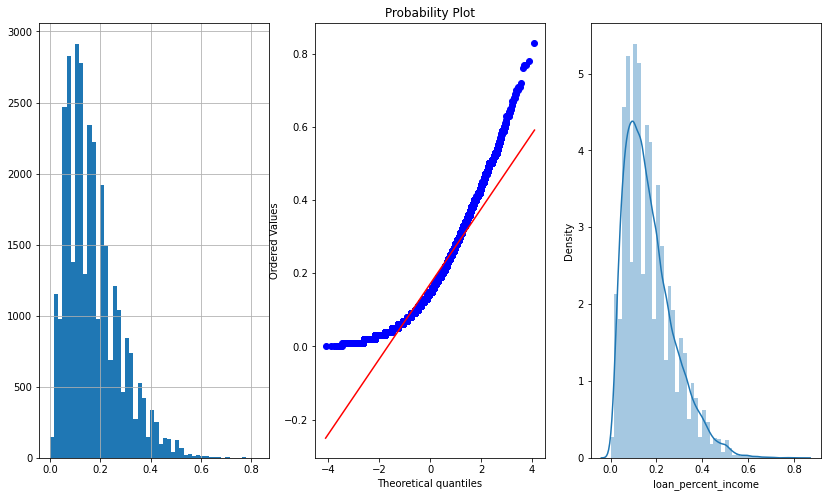

Plots for cb_person_cred_hist_length cloumn with no transformation: 


c:\users\koriv\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


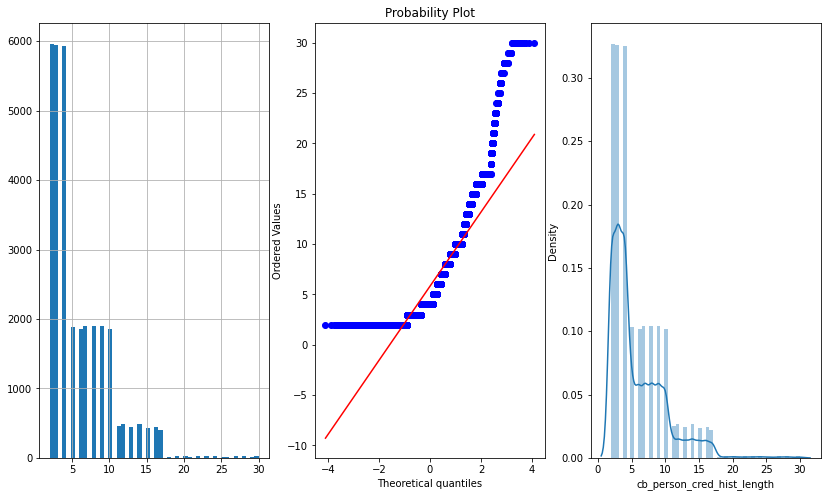

In [4]:
# Function to take in DataFrame and Variable to plot histogram and Q-Q plot
def plotvariale(df, variable, transformation):
    print("Plots for %s cloumn with %s transformation: "%(variable, transformation))
    plt.figure(figsize=(14,8))
    plt.subplot(1,3,1) ## means 1 row , 2 columns and 1st plot
    df[variable].hist(bins=50)
    
    ## QQ plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist="norm", plot=plt)
        
    ## fiting Histogram using distplot
    plt.subplot(1,3,3)
    sns.distplot(df[variable])
    
    plt.show()
    
    
#Check the plots for unTransformed column, Right skew indicates log transformation fits fine
transformation = 'no'
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#for column in dfx.select_dtypes(include=numerics):
#    plotvariale(dfx, column, transformation)
num_cols = [col for col in df if df[col].dtypes != 'O']
for column in num_cols:
    if column == 'loan_status':
        continue
    plotvariale(df, column, transformation)


# Train Test split  
Drop any duplicates in the dataset to avoid overfitting  
use stratify and shuffel for preserving and proper distribution of data  

In [5]:
# Elimination of Duplicate Data
df.drop_duplicates(inplace=True)
print(">>Shape of Current Original Data after Duplicate removal: ",df.shape)

>>Shape of Current Original Data after Duplicate removal:  (32416, 12)


In [6]:
# Train Test split of Data for generalised error with stratify and shuffel to maintain the distribution quality
X, X_test, y, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'],
                                        random_state=0,  test_size=0.2, stratify=df['loan_status'],
                                        shuffle=True)

In [7]:
# Check Splits for Distributions in the Train and Test Data with Respect to Original data
print("Normalized df data: \n",df['loan_status'].value_counts(normalize=True))
print("Normalized Train Split: \n",y.value_counts(normalize=True))
print("Normalized Train Split: \n",y_test.value_counts(normalize=True))

Normalized df data: 
 0    0.781312
1    0.218688
Name: loan_status, dtype: float64
Normalized Train Split: 
 0    0.781313
1    0.218687
Name: loan_status, dtype: float64
Normalized Train Split: 
 0    0.781308
1    0.218692
Name: loan_status, dtype: float64


# Data Prerpocessing  
Fill any missing values in the catogorical varibales. #Not Done  
Do encoding if needed for catogorical variables. #Not Done  
Data Preprocessing for eliminating obiviously false data  
Missing Data handling using best guess and KNN(or alternativly Iterative imputer). #Not Done      
Outlier handeling using IQR     
Feature Selection using Variance threshold and Correlation matrix. #Not Done  
Convertion of Catogorical to numerical using One-Hot and Ordinal encodings  
Develop the pre-processing model to fit and transform the test data also based on estimates from the training data  
No Additional steps for Random Forest  
Future transformation using log and scaling using Standarzation for logistic and SVM   
Scale the data using Min_Max for KNN   

## Feature Selection via Business knoledge

In [8]:
## from the business it was identified that loan_percent_income was based on person_income and loan_amnt, making loan_percent_income a dependent variable which should be removed
X.drop('loan_percent_income', axis=1, inplace=True)
display(X)

# Update y matrix based X
## since we've removed some data from X, we need to pass on these updations to y as well, as y doesn't know some of its corresponding X's have been deleted.
y = y[X.index]


###########################Repeat the same for Test Data########################################################################
#X_test.drop('loan_percent_income', axis=1, inplace=True)
#display(X_test)
#y_test = y_test[X_test.index]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
21415,33,48000,OWN,11.0,HOMEIMPROVEMENT,B,10000,9.99,N,8
12916,25,85000,MORTGAGE,5.0,DEBTCONSOLIDATION,C,7500,11.03,Y,3
2938,26,125000,RENT,10.0,MEDICAL,B,3000,12.21,N,4
19114,29,62000,RENT,4.0,DEBTCONSOLIDATION,C,2300,13.43,Y,6
6057,24,48000,MORTGAGE,4.0,MEDICAL,B,4200,11.99,N,4
...,...,...,...,...,...,...,...,...,...,...
23921,29,67422,MORTGAGE,13.0,EDUCATION,B,12800,11.49,N,8
27783,29,195000,MORTGAGE,5.0,VENTURE,C,3600,14.26,N,7
24358,27,72000,OWN,2.0,EDUCATION,B,12000,9.99,N,9
2544,23,30000,RENT,0.0,MEDICAL,A,3000,5.79,N,3


## Imputing missing values and Encoding for Catogorical Variables

In [9]:
# Encode Catogorical Variables
cat_cols = [col for col in X if X[col].dtypes == 'O']
print("Catogorical Columns are: \n",cat_cols)
num_cols = [col for col in X if X[col].dtypes != 'O']
print("Numerical Columns are: \n",num_cols)

Catogorical Columns are: 
 ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
Numerical Columns are: 
 ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']


In [10]:
# Ordinal Encoding for person_home_ownership and cb_person_default_on_file for Catogorical Ordinal Variables (lable encoder is for Target)
## cols_to_be_OE
col_catO = ['person_home_ownership', 'cb_person_default_on_file']

## Handeling missing value via droping the null rows for cb_person_default_on_file column
X = X[X[col_catO[1]].notnull()]
## Handeling missing values with best guesses for person_home_ownership
person_home_ownership_Imputer = SimpleImputer(strategy='constant', add_indicator=True, fill_value='OTHER')
person_home_ownership_Imputer.fit(X[[col_catO[0]]])
### Reassgning to original Tarin Data
X[[col_catO[0]]] = pd.DataFrame(person_home_ownership_Imputer.transform(X[[col_catO[0]]]), 
                                columns=[[col_catO[0]]])[[col_catO[0]]].to_numpy() #use .to_numpy() or .values to aviod nan values due to indexing issues
                                                         

## Ordinal Encoder for person_home_ownership
person_home_ownership_unique =['OTHER','RENT','MORTGAGE','OWN'] #In ascending order
## Ordinal Encoder for cb_person_default_on_file
cb_person_default_on_file_unique =['Y','N'] #In ascending order

## Ordinal Encoder
oe_cat = OrdinalEncoder(categories=[person_home_ownership_unique, cb_person_default_on_file_unique])
oe_cat.fit(X[col_catO])
print(">>Transformed Ordinal Encoder: ")
display(pd.DataFrame(oe_cat.transform(X[col_catO]), columns=col_catO))
#print(">>Feature names in the Ordinal Encoder:",oe_cat.get_feature_names())

## Reassgning to original Tarin Data
X[col_catO] = pd.DataFrame(oe_cat.transform(X[col_catO]), columns=col_catO)[col_catO].to_numpy() #use .to_numpy() or .values to aviod nan values due to indexing issues
print(">>Transformed Ordinal Encoder Appended to the Train Data: ")
display(X)
X.isnull().sum() 



>>Transformed Ordinal Encoder: 


,person_home_ownership,cb_person_default_on_file
0,3.0,1.0
1,2.0,0.0
2,1.0,1.0
3,1.0,0.0
4,2.0,1.0
...,...,...
25927,2.0,1.0
25928,2.0,1.0
25929,3.0,1.0
25930,1.0,1.0


>>Transformed Ordinal Encoder Appended to the Train Data: 


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
21415,33,48000,3.0,11.0,HOMEIMPROVEMENT,B,10000,9.99,1.0,8
12916,25,85000,2.0,5.0,DEBTCONSOLIDATION,C,7500,11.03,0.0,3
2938,26,125000,1.0,10.0,MEDICAL,B,3000,12.21,1.0,4
19114,29,62000,1.0,4.0,DEBTCONSOLIDATION,C,2300,13.43,0.0,6
6057,24,48000,2.0,4.0,MEDICAL,B,4200,11.99,1.0,4
...,...,...,...,...,...,...,...,...,...,...
23921,29,67422,2.0,13.0,EDUCATION,B,12800,11.49,1.0,8
27783,29,195000,2.0,5.0,VENTURE,C,3600,14.26,1.0,7
24358,27,72000,3.0,2.0,EDUCATION,B,12000,9.99,1.0,9
2544,23,30000,1.0,0.0,MEDICAL,A,3000,5.79,1.0,3


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              726
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2493
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
# One hot Encoding for loan_intent and loan_grade for Catogorical Nominal Variables
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
## cols_to_be_OE
col_catOHE = ['loan_intent', 'loan_grade']

## Handeling missing values with best guesses for loan_intent
loan_intent_Imputer = SimpleImputer(strategy='constant', add_indicator=False, fill_value='missing')
loan_intent_Imputer.fit(X[[col_catOHE[0]]])
### Reassgning to original Tarin Data
X[[col_catOHE[0]]] = pd.DataFrame(loan_intent_Imputer.transform(X[[col_catOHE[0]]]), 
                                columns=[[col_catOHE[0]]])[[col_catOHE[0]]].to_numpy() #use .to_numpy() or .values to aviod nan values due to indexing issues

## Handeling missing values with best guesses for loan_grade
loan_grade_ownership_Imputer = SimpleImputer(strategy='constant', add_indicator=False, fill_value='missing')
loan_grade_ownership_Imputer.fit(X[[col_catOHE[1]]])
### Reassgning to original Tarin Data
X[[col_catOHE[1]]] = pd.DataFrame(loan_grade_ownership_Imputer.transform(X[[col_catOHE[1]]]), 
                                columns=[[col_catOHE[1]]])[[col_catOHE[1]]].to_numpy() #use .to_numpy() or .values to aviod nan values due to indexing issues

## One-hot-Encoder Encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(X[col_catOHE])
print(">>Original Untranformed Dataframe: ")
display(X)
print(">>One Hot Encoded Dataframe: ")
display(pd.DataFrame(ohe.transform(X[col_catOHE]), columns=ohe.get_feature_names()))

## Reassgning to original Tarin Data
X[ohe.get_feature_names()] = pd.DataFrame(ohe.transform(X[col_catOHE]), columns=ohe.get_feature_names()).to_numpy()
X=X.drop(col_catOHE, axis = 1)
print(">>Original tranformed Dataframe: ")
display(X)
print(">>dtypes of the tranformed Dataframe: \n",X.dtypes)

>>Original Untranformed Dataframe: 


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
21415,33,48000,3.0,11.0,HOMEIMPROVEMENT,B,10000,9.99,1.0,8
12916,25,85000,2.0,5.0,DEBTCONSOLIDATION,C,7500,11.03,0.0,3
2938,26,125000,1.0,10.0,MEDICAL,B,3000,12.21,1.0,4
19114,29,62000,1.0,4.0,DEBTCONSOLIDATION,C,2300,13.43,0.0,6
6057,24,48000,2.0,4.0,MEDICAL,B,4200,11.99,1.0,4
...,...,...,...,...,...,...,...,...,...,...
23921,29,67422,2.0,13.0,EDUCATION,B,12800,11.49,1.0,8
27783,29,195000,2.0,5.0,VENTURE,C,3600,14.26,1.0,7
24358,27,72000,3.0,2.0,EDUCATION,B,12000,9.99,1.0,9
2544,23,30000,1.0,0.0,MEDICAL,A,3000,5.79,1.0,3


>>One Hot Encoded Dataframe: 


,x0_DEBTCONSOLIDATION,x0_EDUCATION,x0_HOMEIMPROVEMENT,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25927,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25928,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25929,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25930,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


>>Original tranformed Dataframe: 


,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
21415,33,48000,3.0,11.0,10000,9.99,1.0,8,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12916,25,85000,2.0,5.0,7500,11.03,0.0,3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2938,26,125000,1.0,10.0,3000,12.21,1.0,4,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19114,29,62000,1.0,4.0,2300,13.43,0.0,6,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6057,24,48000,2.0,4.0,4200,11.99,1.0,4,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23921,29,67422,2.0,13.0,12800,11.49,1.0,8,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27783,29,195000,2.0,5.0,3600,14.26,1.0,7,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24358,27,72000,3.0,2.0,12000,9.99,1.0,9,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2544,23,30000,1.0,0.0,3000,5.79,1.0,3,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


>>dtypes of the tranformed Dataframe: 
 person_age                      int64
person_income                   int64
person_home_ownership         float64
person_emp_length             float64
loan_amnt                       int64
loan_int_rate                 float64
cb_person_default_on_file     float64
cb_person_cred_hist_length      int64
x0_DEBTCONSOLIDATION          float64
x0_EDUCATION                  float64
x0_HOMEIMPROVEMENT            float64
x0_MEDICAL                    float64
x0_PERSONAL                   float64
x0_VENTURE                    float64
x1_A                          float64
x1_B                          float64
x1_C                          float64
x1_D                          float64
x1_E                          float64
x1_F                          float64
x1_G                          float64
dtype: object


## Mising Data handeling via droping 

In [12]:
X.isnull().sum() # seems like they were nulls in person_emp_length and loan_int_rate which are both 

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              726
loan_amnt                        0
loan_int_rate                 2493
cb_person_default_on_file        0
cb_person_cred_hist_length       0
x0_DEBTCONSOLIDATION             0
x0_EDUCATION                     0
x0_HOMEIMPROVEMENT               0
x0_MEDICAL                       0
x0_PERSONAL                      0
x0_VENTURE                       0
x1_A                             0
x1_B                             0
x1_C                             0
x1_D                             0
x1_E                             0
x1_F                             0
x1_G                             0
dtype: int64

In [13]:
# Visualizing missing value
print(">>Missing values in person_emp_length column:")
display(X[X.person_emp_length.isnull()])
print(">>Missing values in loan_int_rate column:")
display(X[X.loan_int_rate.isnull()])

>>Missing values in person_emp_length column:


,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
21692,27,50000,3.0,NaN,5125,9.99,1.0,10,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1793,24,24000,1.0,NaN,2000,12.69,1.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
741,22,21600,2.0,NaN,4025,5.42,1.0,4,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29613,36,33600,3.0,NaN,15000,18.39,1.0,16,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14026,23,88000,2.0,NaN,1000,13.49,0.0,4,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18508,33,12000,1.0,NaN,1000,7.88,1.0,7,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27400,28,21084,3.0,NaN,7750,7.51,1.0,9,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16854,24,75000,2.0,NaN,7000,7.66,1.0,3,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21492,28,23000,1.0,NaN,6000,8.88,1.0,5,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


>>Missing values in loan_int_rate column:


,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
19829,29,36000,2.0,2.0,20000,NaN,1.0,6,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23768,32,96000,1.0,8.0,9500,NaN,1.0,5,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9743,22,64000,2.0,6.0,6000,NaN,1.0,4,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15644,24,150000,2.0,3.0,15000,NaN,1.0,2,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16203,25,60000,1.0,1.0,10000,NaN,1.0,4,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404,62,66000,1.0,2.0,6000,NaN,1.0,23,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10848,24,70000,2.0,3.0,11000,NaN,1.0,3,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22642,35,56566,2.0,3.0,3200,NaN,1.0,6,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18499,29,53313,1.0,13.0,19850,NaN,1.0,7,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Fit and transform KNNImputer with Training Data
#from sklearn.impute import KNNImputer
#knn = KNNImputer(n_neighbors=5, add_indicator=True, weights='distance')
#knn.fit(X_train[num]) # Using a dataset with allnumerical values
#pd.DataFrame(knn.transform(X_train[num])).head()

#for now we will drop the missing data to reduce model complexity
print(">>Un-transformed X: ",X.shape)
X = X.dropna()
print(">>Transformed X: ",X.shape)
X.isnull().sum()

>>Un-transformed X:  (25932, 21)
>>Transformed X:  (22763, 21)


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
x0_DEBTCONSOLIDATION          0
x0_EDUCATION                  0
x0_HOMEIMPROVEMENT            0
x0_MEDICAL                    0
x0_PERSONAL                   0
x0_VENTURE                    0
x1_A                          0
x1_B                          0
x1_C                          0
x1_D                          0
x1_E                          0
x1_F                          0
x1_G                          0
dtype: int64

In [15]:
## Update y matrix based X
## since we've removed some data from X, we need to pass on these updations to y as well, as y doesn't know some of its corresponding X's have been deleted.
print(">>Un-transformed y: ",y.shape)
y = y[X.index]
print(">>Transformed y: ",y.shape)
y

>>Un-transformed y:  (25932,)
>>Transformed y:  (22763,)


21415    0
12916    0
2938     0
19114    1
6057     0
        ..
23921    0
27783    1
24358    0
2544     0
6848     0
Name: loan_status, Length: 22763, dtype: int64

## Outlier handling via IQR

In [16]:
# Prepare the list of catogorical Columns to be exculed
ohe_columns=["x0_DEBTCONSOLIDATION",
"x0_EDUCATION",
"x0_HOMEIMPROVEMENT",
"x0_MEDICAL",
"x0_PERSONAL",
"x0_VENTURE",
"x1_A",
"x1_B",
"x1_C",
"x1_D",
"x1_E",
"x1_F",
"x1_G"]
ordinal_Columns=["person_home_ownership", "cb_person_default_on_file"]
catogorical_Columns=ohe_columns+ordinal_Columns
catogorical_Columns

['x0_DEBTCONSOLIDATION',
 'x0_EDUCATION',
 'x0_HOMEIMPROVEMENT',
 'x0_MEDICAL',
 'x0_PERSONAL',
 'x0_VENTURE',
 'x1_A',
 'x1_B',
 'x1_C',
 'x1_D',
 'x1_E',
 'x1_F',
 'x1_G',
 'person_home_ownership',
 'cb_person_default_on_file']

In [17]:
num_cols = [col for col in X if col not in catogorical_Columns]
print(">>numerical columns in analysis: ", num_cols)
outlier_Dict = dict()
for col in num_cols:
    X_min = X[col].min()
    X_max = X[col].max()
    median = X[col].median()
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    outlier_Dict[col] = {'25quantile':q1, '75quantile':q3, 
                         'iqr':iqr, 'min': X_min, 'max':X_max, 'median':median, 
                         'lower_limit':lower_limit, 'upper_limit':upper_limit}
    
import json
print(">>Outlier IQR results:\n",json.dumps(outlier_Dict,sort_keys=False, indent=4, default=str))

>>numerical columns in analysis:  ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']
>>Outlier IQR results:
 {
    "person_age": {
        "25quantile": 23.0,
        "75quantile": 30.0,
        "iqr": 7.0,
        "min": "20",
        "max": "144",
        "median": 26.0,
        "lower_limit": 12.5,
        "upper_limit": 40.5
    },
    "person_income": {
        "25quantile": 39306.0,
        "75quantile": 80000.0,
        "iqr": 40694.0,
        "min": "4000",
        "max": "6000000",
        "median": 55596.0,
        "lower_limit": -21735.0,
        "upper_limit": 141041.0
    },
    "person_emp_length": {
        "25quantile": 2.0,
        "75quantile": 7.0,
        "iqr": 5.0,
        "min": 0.0,
        "max": 123.0,
        "median": 4.0,
        "lower_limit": -5.5,
        "upper_limit": 14.5
    },
    "loan_amnt": {
        "25quantile": 5000.0,
        "75quantile": 12500.0,
        "iqr": 7500.0,
        "m

In [18]:
## Analysis for each column based on IQR outliers
for column in outlier_Dict:
    lower_limit =outlier_Dict[column]['lower_limit']
    upper_limit =outlier_Dict[column]['upper_limit']
    print(">>Outliers for %s are with %s lower_limit and %s upper_limit are: "%(column, lower_limit, upper_limit))
    display(X[(X[column]<=lower_limit)|(X[column]>=upper_limit)])
    print("percentile based outliers for columns %s is %s "%(column ,np.round(len(X[(X[column]<=lower_limit)|(X[column]>=upper_limit)])/len(X) *100, 3)))

>>Outliers for person_age are with 12.5 lower_limit and 40.5 upper_limit are: 


,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
31347,41,125000,1.0,0.0,12000,13.49,0.0,12,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31295,45,36700,3.0,7.0,2000,7.51,1.0,16,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32526,64,120000,2.0,0.0,20000,11.11,1.0,25,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31058,43,60000,1.0,2.0,10000,13.24,0.0,15,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30254,43,50000,3.0,3.0,5000,13.35,0.0,12,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32297,144,6000000,2.0,12.0,5000,12.73,1.0,25,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32001,41,40000,1.0,3.0,9200,7.49,1.0,15,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30133,46,47000,2.0,5.0,6000,7.14,1.0,15,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30209,44,49510,2.0,5.0,4000,10.62,1.0,14,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


percentile based outliers for columns person_age is 4.485 
>>Outliers for person_income are with -21735.0 lower_limit and 141041.0 upper_limit are: 


,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
31357,39,275000,1.0,12.0,12000,8.49,1.0,14,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32075,43,400000,2.0,5.0,28000,9.91,1.0,11,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15874,26,220836,2.0,10.0,9000,11.26,1.0,3,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17906,29,280000,2.0,6.0,15000,12.99,1.0,7,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18003,31,200000,2.0,3.0,30000,8.90,1.0,5,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,36,155000,2.0,9.0,30000,7.90,1.0,14,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32297,144,6000000,2.0,12.0,5000,12.73,1.0,25,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17892,34,300000,2.0,18.0,16000,10.74,1.0,9,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15594,25,150000,3.0,0.0,14400,8.90,1.0,4,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


percentile based outliers for columns person_income is 4.52 
>>Outliers for person_emp_length are with -5.5 lower_limit and 14.5 upper_limit are: 


,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
31132,38,35000,1.0,22.0,11100,6.62,1.0,14,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28998,33,68508,1.0,17.0,7000,8.00,1.0,10,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31849,36,160000,3.0,20.0,24000,14.96,0.0,14,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31053,41,75000,2.0,19.0,5500,12.87,0.0,16,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27560,32,150000,2.0,16.0,6000,7.49,1.0,9,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24053,32,69900,2.0,16.0,18000,11.49,1.0,8,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21035,32,54000,1.0,16.0,8500,7.49,1.0,6,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21400,33,48000,2.0,17.0,7000,6.62,1.0,8,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32447,57,64000,1.0,20.0,8000,8.90,1.0,19,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


percentile based outliers for columns person_emp_length is 2.794 
>>Outliers for loan_amnt are with -6250.0 lower_limit and 23750.0 upper_limit are: 


,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
32071,37,88000,1.0,4.0,25000,19.66,0.0,15,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30903,37,70000,2.0,2.0,30000,10.65,1.0,14,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18255,35,105000,1.0,6.0,24000,9.25,1.0,7,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32075,43,400000,2.0,5.0,28000,9.91,1.0,11,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15324,24,130000,2.0,4.0,25000,10.74,1.0,3,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31778,38,140000,3.0,13.0,24000,12.18,1.0,15,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15365,23,130104,2.0,7.0,24000,6.54,1.0,2,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6164,25,48000,2.0,6.0,24250,10.25,1.0,3,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27397,34,138000,2.0,14.0,25000,11.12,1.0,6,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


percentile based outliers for columns loan_amnt is 5.21 
>>Outliers for loan_int_rate are with -0.47000000000000064 lower_limit and 21.85 upper_limit are: 


,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
27425,28,128000,2.0,11.0,14400,22.11,0.0,8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27851,28,288000,2.0,12.0,18000,22.48,0.0,9,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29277,38,83000,1.0,3.0,22250,23.22,0.0,12,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13499,26,44000,1.0,4.0,12500,22.11,0.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18829,31,22000,1.0,5.0,1400,22.06,0.0,7,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


percentile based outliers for columns loan_int_rate is 0.022 
>>Outliers for cb_person_cred_hist_length are with -4.5 lower_limit and 15.5 upper_limit are: 


,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
31295,45,36700,3.0,7.0,2000,7.51,1.0,16,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32526,64,120000,2.0,0.0,20000,11.11,1.0,25,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29351,38,48384,1.0,4.0,19000,14.96,0.0,16,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30742,46,48000,1.0,1.0,8400,18.54,1.0,16,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32564,53,45000,1.0,0.0,5600,13.79,1.0,28,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32447,57,64000,1.0,20.0,8000,8.90,1.0,19,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29374,36,82000,1.0,12.0,18000,13.22,1.0,17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29731,38,36156,2.0,1.0,8500,12.21,1.0,16,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30748,40,63996,2.0,8.0,12000,10.25,1.0,17,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


percentile based outliers for columns cb_person_cred_hist_length is 3.422 


In [19]:
## Analysis at table level based on IQR outliers
for column in outlier_Dict:
    lower_limit =outlier_Dict[column]['lower_limit']
    upper_limit =outlier_Dict[column]['upper_limit']
    print(">>Outliers for %s are with %s lower_limit and %s upper_limit are: "%(column, lower_limit, upper_limit))
    X = X[(X[column]>lower_limit)&(X[column]<upper_limit)]
    print("percentile based non-outliers for columns %s is %s "%(column ,
                                                                 np.round(len(X[(X[column]>lower_limit)&
                                                                                (X[column]<upper_limit)])/len(X) *100, 3)))
    
print("\n>>Refined Tarining data: ")
display(X)
print()

>>Outliers for person_age are with 12.5 lower_limit and 40.5 upper_limit are: 
percentile based non-outliers for columns person_age is 100.0 
>>Outliers for person_income are with -21735.0 lower_limit and 141041.0 upper_limit are: 
percentile based non-outliers for columns person_income is 100.0 
>>Outliers for person_emp_length are with -5.5 lower_limit and 14.5 upper_limit are: 
percentile based non-outliers for columns person_emp_length is 100.0 
>>Outliers for loan_amnt are with -6250.0 lower_limit and 23750.0 upper_limit are: 
percentile based non-outliers for columns loan_amnt is 100.0 
>>Outliers for loan_int_rate are with -0.47000000000000064 lower_limit and 21.85 upper_limit are: 
percentile based non-outliers for columns loan_int_rate is 100.0 
>>Outliers for cb_person_cred_hist_length are with -4.5 lower_limit and 15.5 upper_limit are: 
percentile based non-outliers for columns cb_person_cred_hist_length is 100.0 

>>Refined Tarining data: 


,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
21415,33,48000,3.0,11.0,10000,9.99,1.0,8,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12916,25,85000,2.0,5.0,7500,11.03,0.0,3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2938,26,125000,1.0,10.0,3000,12.21,1.0,4,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19114,29,62000,1.0,4.0,2300,13.43,0.0,6,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6057,24,48000,2.0,4.0,4200,11.99,1.0,4,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13069,24,87504,3.0,9.0,7000,8.88,1.0,3,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23921,29,67422,2.0,13.0,12800,11.49,1.0,8,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24358,27,72000,3.0,2.0,12000,9.99,1.0,9,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2544,23,30000,1.0,0.0,3000,5.79,1.0,3,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
## Update y matrix based X
## since we've removed some data from X, we need to pass on these updations to y as well, as y doesn't know some of its corresponding X's have been deleted.
print(">>Un-transformed y: ",y.shape)
y = y[X.index]
print(">>Transformed y: ",y.shape)
y

>>Un-transformed y:  (22763,)
>>Transformed y:  (19206,)


21415    0
12916    0
2938     0
19114    1
6057     0
        ..
13069    0
23921    0
24358    0
2544     0
6848     0
Name: loan_status, Length: 19206, dtype: int64

#### Based on above IQR analysis they were 22763-18888=3875 bad data points in the training Data.

# Feature Scaling not needed for Tree based algorithms, so finalize the feature set for Random Forest

In [21]:
X_tree_train=X.copy(deep=True)
y_tree_train=y.copy(deep=True)
#X_tree_test=X_test
#y_tree_test=y_test

## Feature Scaling via Min-Max Scaler
If you are using Min-Max Scaler its not neccessary to have special procedure to handel binary valued(0 and 1) columns in the Data

In [22]:
binary_columns=['x0_DEBTCONSOLIDATION',
 'x0_EDUCATION',
 'x0_HOMEIMPROVEMENT',
 'x0_MEDICAL',
 'x0_PERSONAL',
 'x0_VENTURE',
 'x1_A',
 'x1_B',
 'x1_C',
 'x1_D',
 'x1_E',
 'x1_F',
 'x1_G',
 'cb_person_default_on_file']
binary_columns

['x0_DEBTCONSOLIDATION',
 'x0_EDUCATION',
 'x0_HOMEIMPROVEMENT',
 'x0_MEDICAL',
 'x0_PERSONAL',
 'x0_VENTURE',
 'x1_A',
 'x1_B',
 'x1_C',
 'x1_D',
 'x1_E',
 'x1_F',
 'x1_G',
 'cb_person_default_on_file']

C:\Users\koriv\AppData\Local\Temp/ipykernel_12528/1078060465.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(13,5))


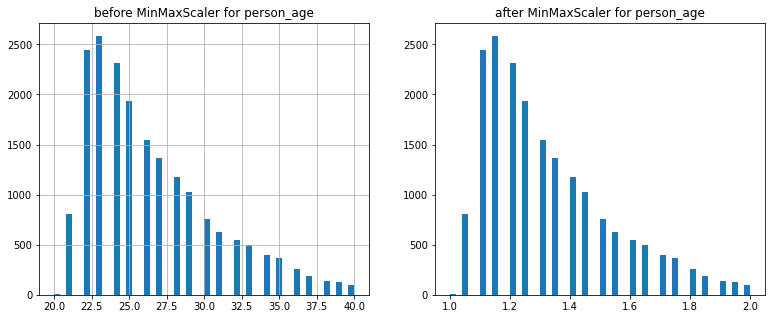

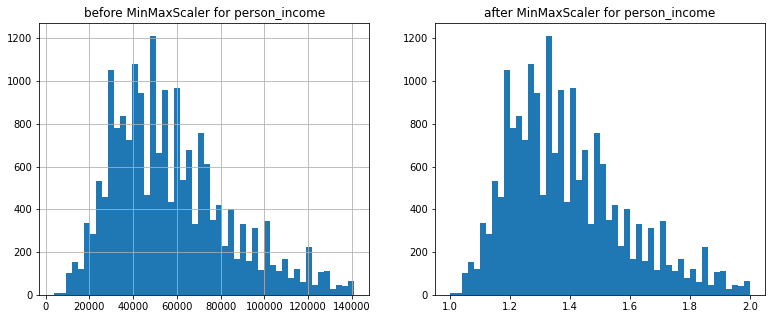

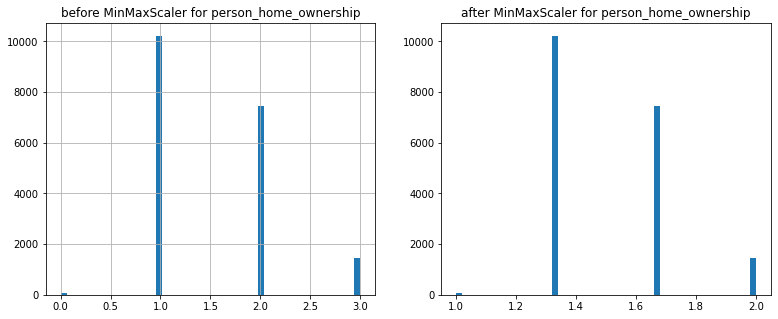

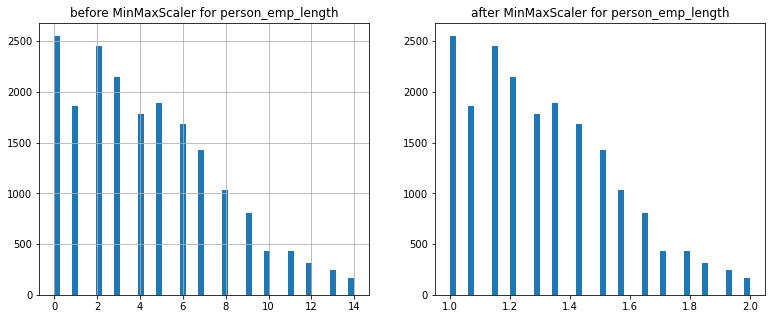

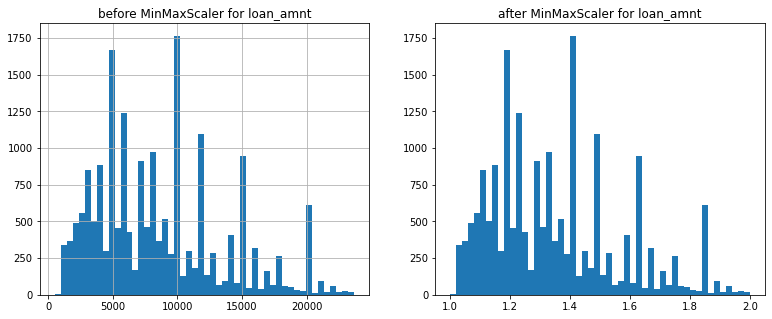

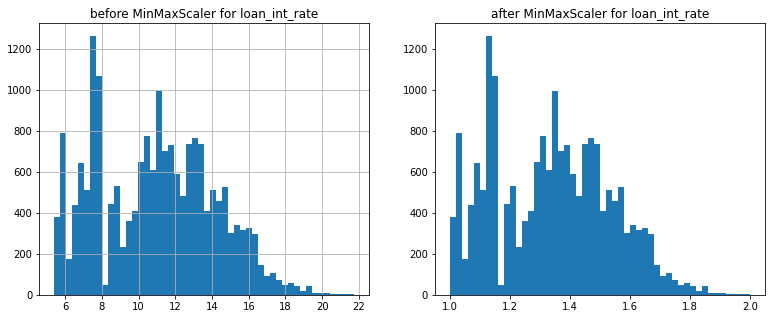

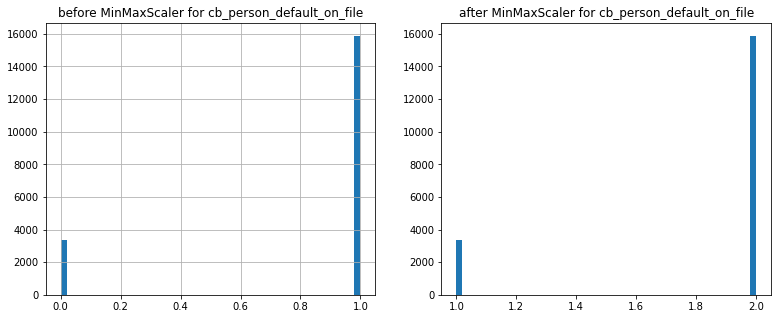

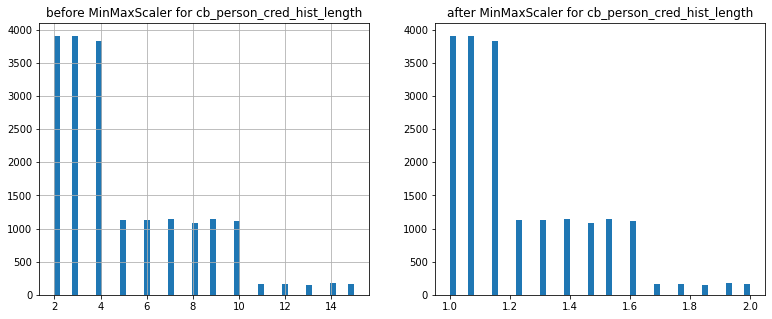

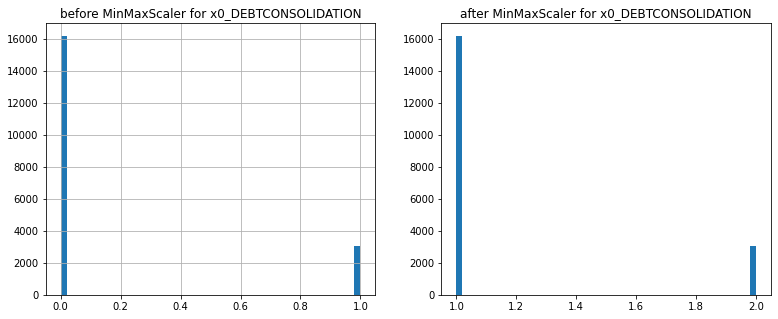

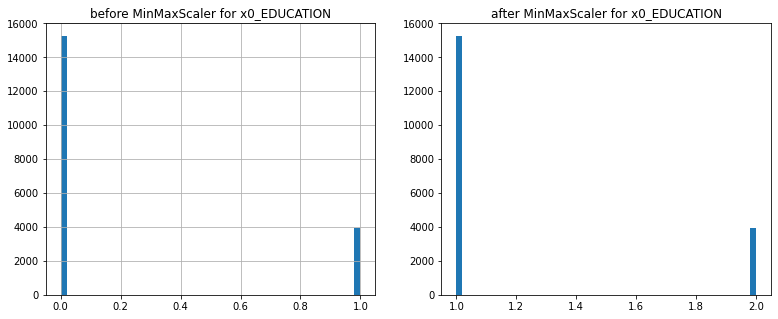

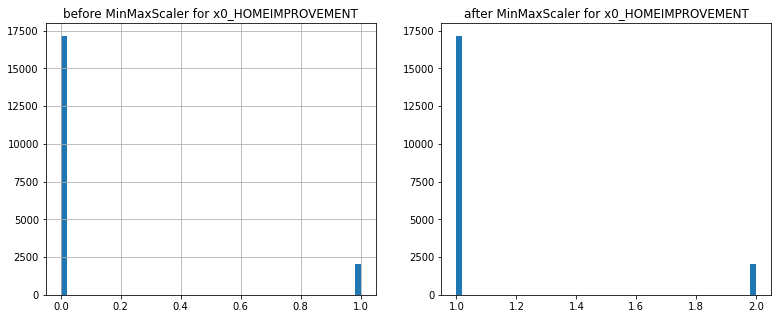

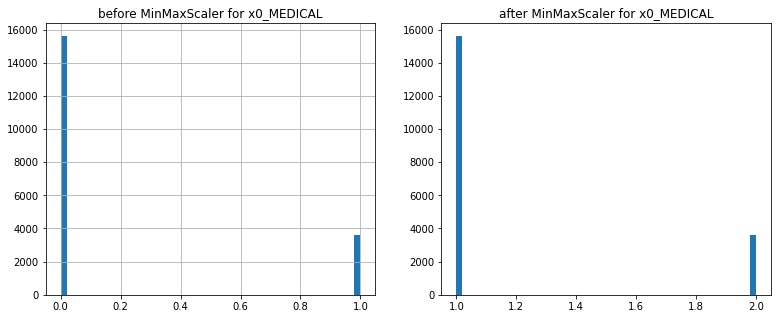

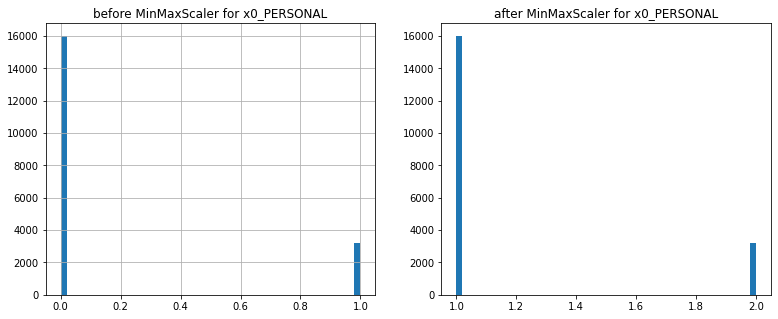

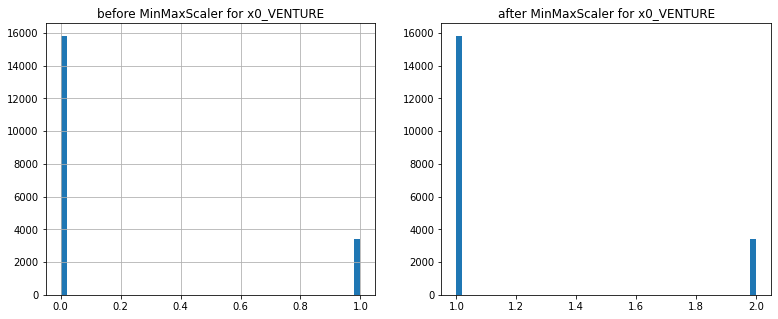

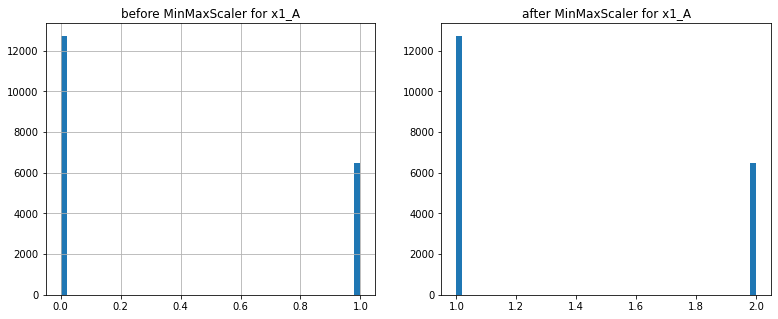

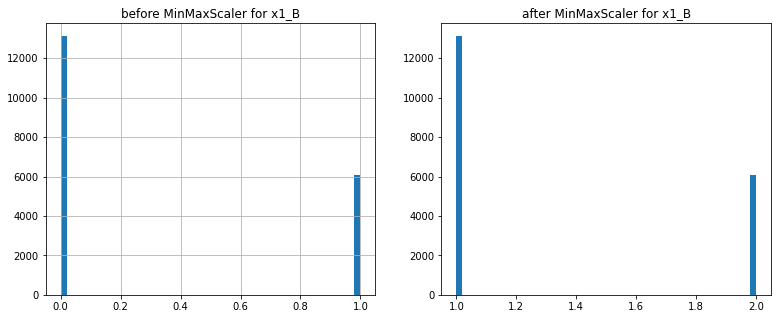

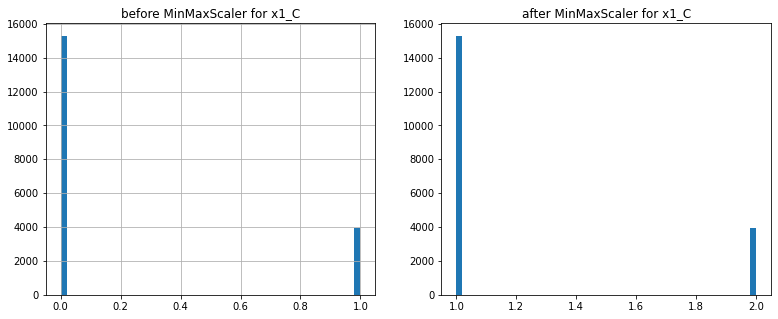

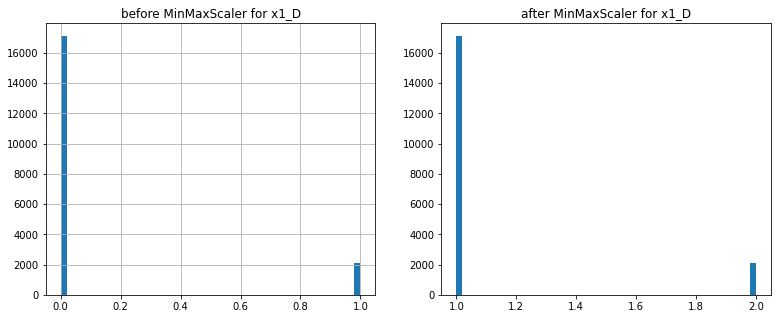

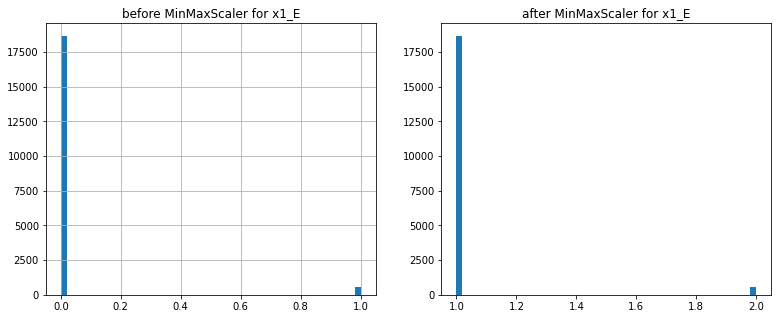

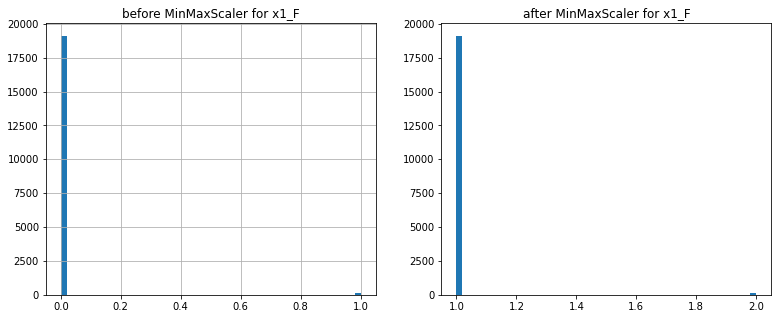

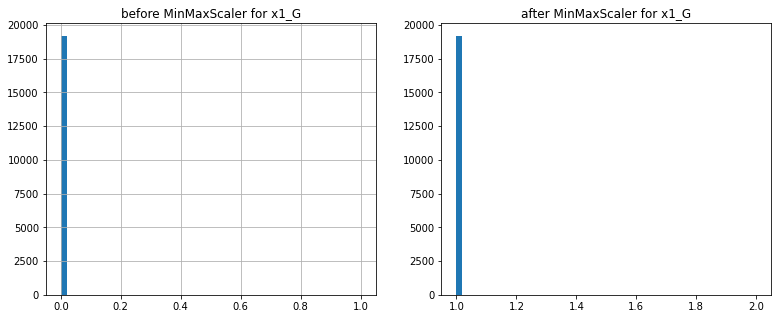

In [23]:
# Visualizing the impact of Scaling
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    #sns.kdeplot(df[var])
    df[var].hist(bins=50)
    plt.title('before ' + str(t).split('(')[0]+' for '+var)
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    #sns.kdeplot(p1)
    plt.hist(p1, bins =50) 
    plt.title('after ' + str(t).split('(')[0]+' for '+var)

for col in X.columns:
    plots(X, col, MinMaxScaler((1,2)))


In [24]:
# fit minMax Scaler and transform the DataSet
model_Scaler=MinMaxScaler((1,2))
model_Scaler.fit(X)

X[X.columns]=model_Scaler.transform(X)
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,x0_DEBTCONSOLIDATION,x0_EDUCATION,...,x0_MEDICAL,x0_PERSONAL,x0_VENTURE,x1_A,x1_B,x1_C,x1_D,x1_E,x1_F,x1_G
21415,1.65,1.320771,2.000000,1.785714,1.409483,1.280025,2.0,1.461538,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
12916,1.25,1.591002,1.666667,1.357143,1.301724,1.343750,1.0,1.076923,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
2938,1.30,1.883143,1.333333,1.714286,1.107759,1.416054,2.0,1.153846,1.0,1.0,...,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
19114,1.45,1.423021,1.333333,1.285714,1.077586,1.490809,1.0,1.307692,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
6057,1.20,1.320771,1.666667,1.285714,1.159483,1.402574,2.0,1.153846,1.0,1.0,...,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13069,1.20,1.609290,2.000000,1.642857,1.280172,1.212010,2.0,1.076923,1.0,1.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
23921,1.45,1.462621,1.666667,1.928571,1.530172,1.371936,2.0,1.461538,1.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
24358,1.35,1.496056,2.000000,1.142857,1.495690,1.280025,2.0,1.538462,1.0,2.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
2544,1.15,1.189308,1.333333,1.000000,1.107759,1.022672,2.0,1.076923,1.0,1.0,...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [25]:
for col in X:
    print(">>Unique values in a column ",col, '--->', X[col].nunique())
    print("dtype of column ",col, '--->', X[col].dtype)
    if X[col].nunique()<20:
        print("Unique values in the column ",col, '--->',X[col].unique())
        print("Normalized values in the column ",col, '--->',X[col].value_counts(normalize=True)*100,"\n")
    print()

>>Unique values in a column  person_age ---> 21
dtype of column  person_age ---> float64

>>Unique values in a column  person_income ---> 2696
dtype of column  person_income ---> float64

>>Unique values in a column  person_home_ownership ---> 4
dtype of column  person_home_ownership ---> float64
Unique values in the column  person_home_ownership ---> [2.         1.66666667 1.33333333 1.        ]
Normalized values in the column  person_home_ownership ---> 1.333333    53.186504
1.666667    38.883682
2.000000     7.622618
1.000000     0.307196
Name: person_home_ownership, dtype: float64 


>>Unique values in a column  person_emp_length ---> 15
dtype of column  person_emp_length ---> float64
Unique values in the column  person_emp_length ---> [1.78571429 1.35714286 1.71428571 1.28571429 1.21428571 1.57142857
 1.         1.07142857 1.14285714 1.42857143 1.5        1.92857143
 1.64285714 1.85714286 2.        ]
Normalized values in the column  person_emp_length ---> 1.000000    13.282308
1.1

# Feature Transformation is not needed for Clustering based algorithms, so finalize the feature set for KNN



In [26]:
X_cluster_train=X.copy(deep=True)
y_cluster_train=y.copy(deep=True)
#X_cluste_test=X
#y_cluste_test=y

## Feature Transformation using log due to positive skew in the Data



In [27]:
# Columns to be transformed
ft_cols=["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate"]
ft_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate']

In [28]:
# Check for any negative values in the test data
(X < 0).any()

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length             False
loan_amnt                     False
loan_int_rate                 False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
x0_DEBTCONSOLIDATION          False
x0_EDUCATION                  False
x0_HOMEIMPROVEMENT            False
x0_MEDICAL                    False
x0_PERSONAL                   False
x0_VENTURE                    False
x1_A                          False
x1_B                          False
x1_C                          False
x1_D                          False
x1_E                          False
x1_F                          False
x1_G                          False
dtype: bool

In [29]:
# Check for any zero values in the test data
(X == 0).any()

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length             False
loan_amnt                     False
loan_int_rate                 False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
x0_DEBTCONSOLIDATION          False
x0_EDUCATION                  False
x0_HOMEIMPROVEMENT            False
x0_MEDICAL                    False
x0_PERSONAL                   False
x0_VENTURE                    False
x1_A                          False
x1_B                          False
x1_C                          False
x1_D                          False
x1_E                          False
x1_F                          False
x1_G                          False
dtype: bool

Plots for person_age cloumn with log transformation: 


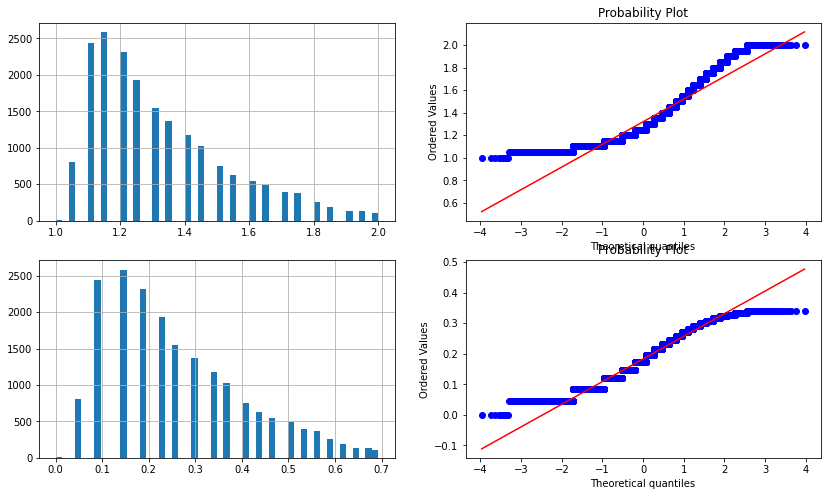

Plots for person_income cloumn with log transformation: 


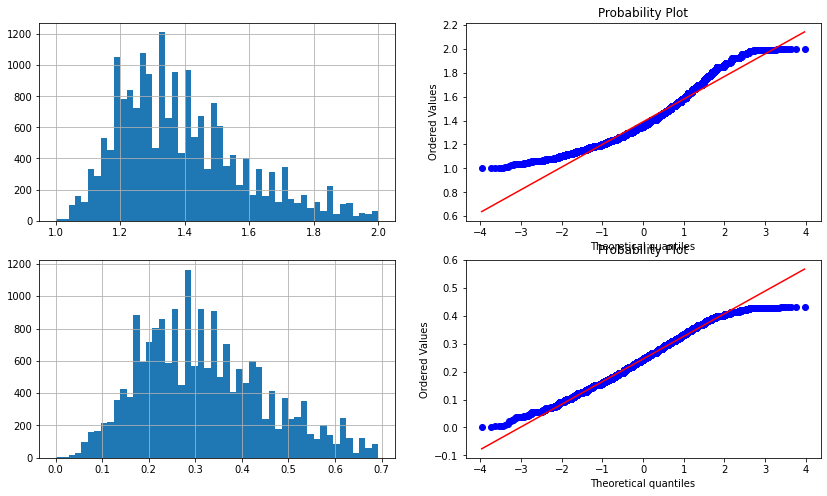

Plots for person_emp_length cloumn with log transformation: 


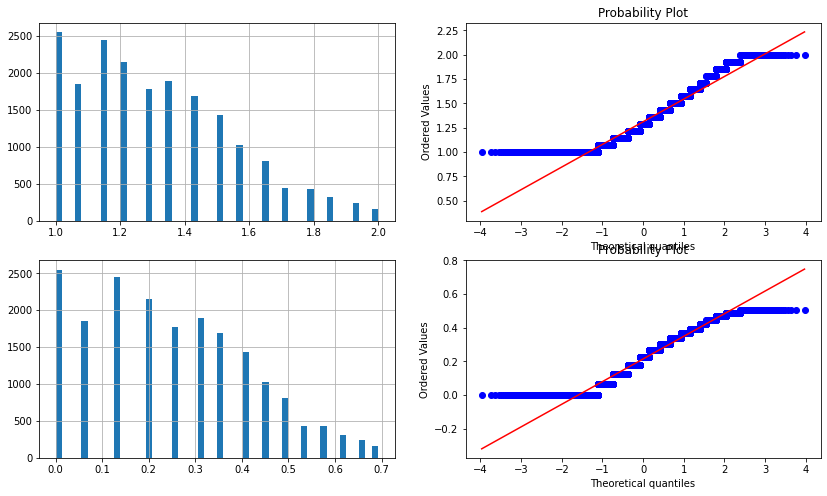

Plots for loan_amnt cloumn with log transformation: 


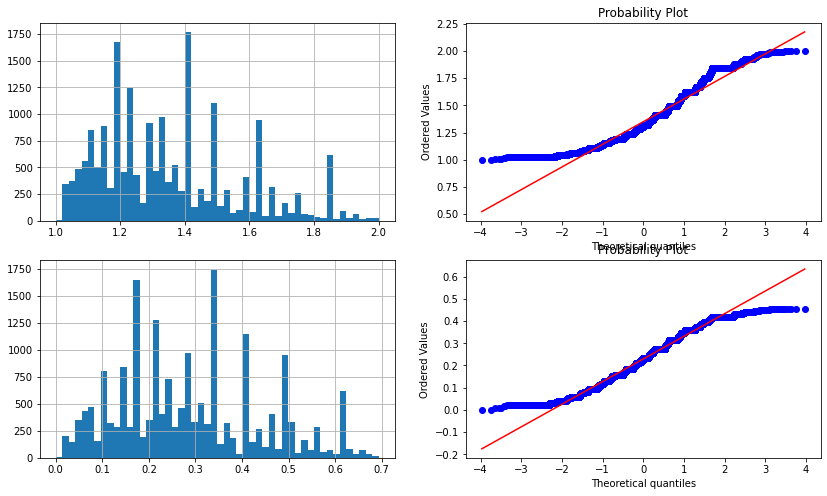

Plots for loan_int_rate cloumn with log transformation: 


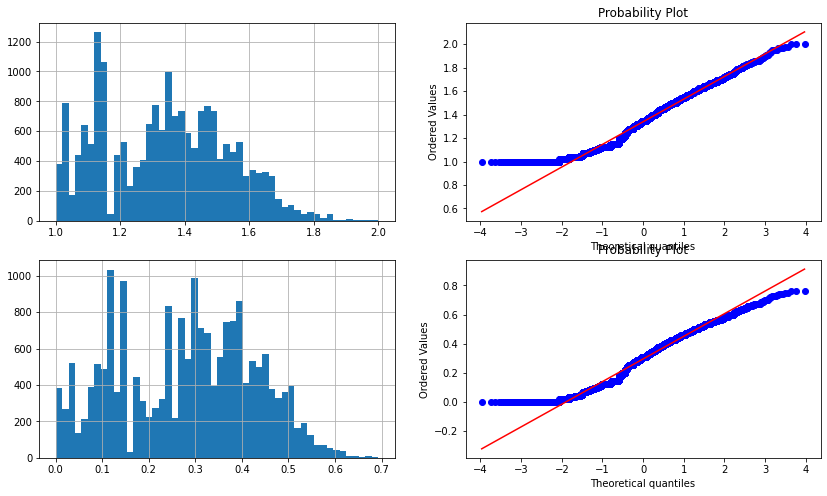

In [33]:
# Function to take in DataFrame and Variable to plot histogram and Q-Q plot
def plotvariale(X, variable, transformation):
    print("Plots for %s cloumn with %s transformation: "%(variable, transformation))
    plt.figure(figsize=(14,8))
    plt.subplot(2,2,1) ## means 1 row , 2 columns and 1st plot
    X[variable].hist(bins=50)
    
    ## QQ plot
    plt.subplot(2,2,2)
    stats.probplot(X[variable], dist="norm", plot=plt)
    
    ## log transformed plots
    # X[variable]=np.log(X[variable])
    plt.subplot(2,2,3) ## means 1 row , 2 columns and 1st plot
    np.log(X[variable]).hist(bins=50)
    
    ## QQ plot
    plt.subplot(2,2,4)
    X[variable], lambdavalue = stats.boxcox(X[variable])
    stats.probplot(X[variable], dist="norm", plot=plt)    
    
    
    plt.show()
    
    
#Check the plots for unTransformed column, Right skew indicates log transformation fits fine
transformation = 'log'
for column in ft_cols:
    plotvariale(X, column, transformation)

### Seems like Feature Transformation doesn't yeild great results, hence the data is not a good fit for Logistic and SVM Models